In [4]:
model_optimization_dict = {
    "train_float32.py": "None",
    "train_float16.py": "Float 16",
    "train_bfloat.py": "Bfloat 16",
    "train_batch.py": "Reduced Batch Size",
    "train_gradient_accumulation.py": "Gradient Accumulation",
    "train_sgd.py": "SGD + Scheduler",
}

model_config_dict = {
    "train_shakespeare_char.py": "Default",
    "train_shakespeare_char_double_layers.py": "Layers x2",
    "train_shakespeare_char_double_context.py": "Context x2",
    "train_shakespeare_char_double_embeddings.py": "Embeddings x2",
}


def process_results(filename):
    with open(filename, "r") as f:
        lines = f.readlines()

    data = []
    current_config = {}

    for line in lines:
        line = line.strip().rstrip("\\")  # Strip trailing backslashes

        if "train_shakespeare_char" in line:
            current_config["Model_config"] = model_config_dict[line.split(": ")[1]]
        elif "File:" in line:
            current_config["Optimization"] = model_optimization_dict[
                line.split(": ")[1]
            ]
        # if "Config:" in line:
        #     current_config['Layers'] = line.split(": ")[1]
        elif "Total training time:" in line:
            current_config["Training Time (s)"] = float(
                line.split(": ")[1].split(" ")[0]
            )
        elif "Maxmum amount of memory used:" in line:
            current_config["Memory Used (GB)"] = float(
                line.split(": ")[1].split(" ")[0]
            )
        elif "Final loss:" in line:
            current_config["Final Loss"] = float(line.split(": ")[1])
        elif "Model Config:" in line:
            continue
        # elif "Layers:" in line:
        #     current_config['Layers'] = int(line.split(": ")[1])
        # elif "Embeddings:" in line:
        #     current_config['Embeddings'] = int(line.split(": ")[1])
        elif "Context:" in line:
            # current_config['Context'] = int(line.split(": ")[1])
            data.append(current_config)
            current_config = {}
        else:
            pass

    return data


results = process_results("final_results.rtf")

# Sample Output
for res in results:
    print(res)

{'Model_config': 'Default', 'Optimization': 'None', 'Training Time (s)': 239.97, 'Memory Used (GB)': 3.2, 'Final Loss': 0.8247}
{'Model_config': 'Context x2', 'Optimization': 'None', 'Training Time (s)': 459.59, 'Memory Used (GB)': 5.83, 'Final Loss': 0.5426}
{'Model_config': 'Embeddings x2', 'Optimization': 'None', 'Training Time (s)': 529.7, 'Memory Used (GB)': 5.94, 'Final Loss': 0.3195}
{'Model_config': 'Layers x2', 'Optimization': 'None', 'Training Time (s)': 424.55, 'Memory Used (GB)': 5.47, 'Final Loss': 0.3751}
{'Model_config': 'Default', 'Optimization': 'Reduced Batch Size', 'Training Time (s)': 104.26, 'Memory Used (GB)': 1.02, 'Final Loss': 1.1896}
{'Model_config': 'Context x2', 'Optimization': 'Reduced Batch Size', 'Training Time (s)': 157.54, 'Memory Used (GB)': 1.9, 'Final Loss': 1.0484}
{'Model_config': 'Embeddings x2', 'Optimization': 'Reduced Batch Size', 'Training Time (s)': 179.93, 'Memory Used (GB)': 1.92, 'Final Loss': 1.3644}
{'Model_config': 'Layers x2', 'Optimiz

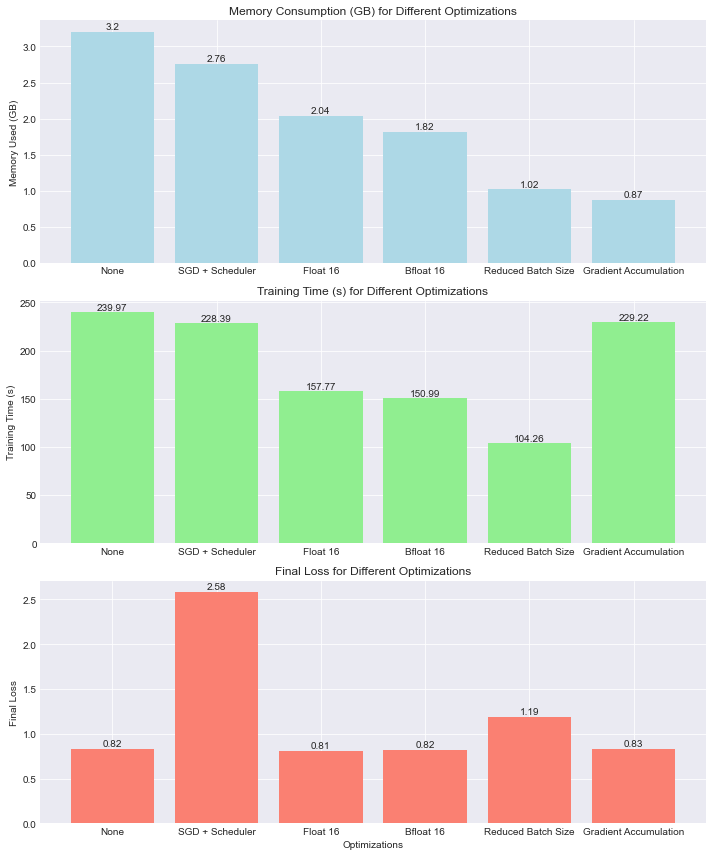

In [5]:
import matplotlib.pyplot as plt

# Filter data for the 'default' Model_config
filtered_data = [entry for entry in results if entry["Model_config"] == "Default"]

# Sort by memory consumption
filtered_data.sort(key=lambda x: x["Memory Used (GB)"], reverse=True)

# Extract optimization types, memory consumption, runtime, and loss after sorting
optimizations = [entry["Optimization"] for entry in filtered_data]
memory_used = [entry["Memory Used (GB)"] for entry in filtered_data]
training_times = [entry["Training Time (s)"] for entry in filtered_data]
losses = [entry["Final Loss"] for entry in filtered_data]

# Plot
plt.style.use("seaborn-darkgrid")  # Use a nicer style
fig, axs = plt.subplots(3, 1, figsize=(10, 12))


# Function to label bars
def label_bars(ax, bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 0.01,
            round(yval, 2),
            ha="center",
            va="bottom",
        )


# Subplot 1: Memory Consumption
bars1 = axs[0].bar(optimizations, memory_used, color="lightblue")
axs[0].set_title("Memory Consumption (GB) for Different Optimizations")
axs[0].set_ylabel("Memory Used (GB)")
label_bars(axs[0], bars1)

# Subplot 2: Runtime
bars2 = axs[1].bar(optimizations, training_times, color="lightgreen")
axs[1].set_title("Training Time (s) for Different Optimizations")
axs[1].set_ylabel("Training Time (s)")
label_bars(axs[1], bars2)

# Subplot 3: Loss
bars3 = axs[2].bar(optimizations, losses, color="salmon")
axs[2].set_title("Final Loss for Different Optimizations")
axs[2].set_ylabel("Final Loss")
axs[2].set_xlabel("Optimizations")
label_bars(axs[2], bars3)

# Adjust layout
plt.tight_layout()
plt.show()

In [12]:
# Global order lists
hyperparameters_order = ["Default", "Context x2", "Layers x2", "Embeddings x2"]
optimizations_order = [
    "None",
    "SGD + Scheduler",
    "Float 16",
    "Bfloat 16",
    "Reduced Batch Size",
    "Gradient Accumulation",
]

In [13]:
def generate_latex_table(results):
    from collections import defaultdict

    # Define the ordering explicitly
    hyperparameters_order = ["Default", "Context x2", "Layers x2", "Embeddings x2"]
    optimizations_order = [
        "None",
        "SGD + Scheduler",
        "Float 16",
        "Bfloat 16",
        "Reduced Batch Size",
        "Gradient Accumulation",
    ]

    # Grouping results by Model_config
    grouped_results = defaultdict(list)
    for entry in results:
        grouped_results[entry["Model_config"]].append(entry)

    # Order the dictionary based on hyperparameters_order
    ordered_grouped_results = {
        k: grouped_results[k] for k in hyperparameters_order if k in grouped_results
    }

    # Sort entries based on optimizations_order for each configuration
    for config in ordered_grouped_results:
        ordered_grouped_results[config].sort(
            key=lambda x: optimizations_order.index(x["Optimization"])
        )

    # --------- Start the LaTeX table environment ---------
    latex_table = "\\begin{table}[h!]\n"
    latex_table += "\\begin{adjustbox}{width=\\textwidth,center}\n"
    latex_table += "\\renewcommand{\\arraystretch}{1.25}\n"  # Adjust the row height
    latex_table += "\\begin{tabular}{|c|c|c|c|c|}\n"

    # --------- Table Header ---------
    latex_table += "\\hline\n"
    latex_table += "\\textbf{Hyperparameters} & \\textbf{Optimization} & \\textbf{Memory Used (GB)} & \\textbf{Training Time (s)} & \\textbf{Final Loss} \\\\ \n\\hline\n"

    # --------- Populate Table Data ---------
    for config, entries in ordered_grouped_results.items():
        num_entries = len(entries)

        # First entry for this model config
        entry = entries[0]
        latex_table += f"\\multirow{{{num_entries}}}{{*}}{{{config}}} & {entry['Optimization']} & {entry['Memory Used (GB)']:.2f} & {entry['Training Time (s)']:.2f} & {entry['Final Loss']:.4f} \\\\ \\cline{{2-5}}\n"

        # Remaining entries
        for entry in entries[1:]:
            latex_table += f"& {entry['Optimization']} & {entry['Memory Used (GB)']:.2f} & {entry['Training Time (s)']:.2f}  & {entry['Final Loss']:.4f} \\\\ \\cline{{2-5}}\n"

        latex_table += "\\hline\n"  # Add separation between different model configs

    # --------- Close the LaTeX table environment ---------
    latex_table += "\\end{tabular}\n"
    latex_table += "\\end{adjustbox}\n"
    latex_table += "\\caption{Training results grouped by model configuration}\n"  # Add table caption
    latex_table += "\\label{tab:training_results}\n"  # Add label for referencing
    latex_table += "\\end{table}"

    return latex_table


# Call the function as before
latex_code = generate_latex_table(results)
print(latex_code)

\begin{table}[h!]
\begin{adjustbox}{width=\textwidth,center}
\renewcommand{\arraystretch}{1.25}
\begin{tabular}{|c|c|c|c|c|}
\hline
\textbf{Hyperparameters} & \textbf{Optimization} & \textbf{Memory Used (GB)} & \textbf{Training Time (s)} & \textbf{Final Loss} \\ 
\hline
\multirow{6}{*}{Default} & None & 3.20 & 239.97 & 0.8247 \\ \cline{2-5}
& SGD + Scheduler & 2.76 & 228.39  & 2.5818 \\ \cline{2-5}
& Float 16 & 2.04 & 157.77  & 0.8079 \\ \cline{2-5}
& Bfloat 16 & 1.82 & 150.99  & 0.8209 \\ \cline{2-5}
& Reduced Batch Size & 1.02 & 104.26  & 1.1896 \\ \cline{2-5}
& Gradient Accumulation & 0.87 & 229.22  & 0.8288 \\ \cline{2-5}
\hline
\multirow{6}{*}{Context x2} & None & 5.83 & 459.59 & 0.5426 \\ \cline{2-5}
& SGD + Scheduler & 5.38 & 449.02  & 2.5865 \\ \cline{2-5}
& Float 16 & 3.71 & 260.81  & 0.5450 \\ \cline{2-5}
& Bfloat 16 & 3.71 & 262.45  & 0.5431 \\ \cline{2-5}
& Reduced Batch Size & 1.90 & 157.54  & 1.0484 \\ \cline{2-5}
& Gradient Accumulation & 1.55 & 375.62  & 0.5513 \\ \clin

In [14]:
def generate_styled_latex_table_by_optimization(results):
    from collections import defaultdict

    # Define the ordering explicitly
    hyperparameters_order = ["Default", "Context x2", "Layers x2", "Embeddings x2"]
    optimizations_order = [
        "None",
        "SGD + Scheduler",
        "Float 16",
        "Bfloat 16",
        "Reduced Batch Size",
        "Gradient Accumulation",
    ]

    # Grouping results by Optimization
    grouped_results = defaultdict(list)
    for entry in results:
        grouped_results[entry["Optimization"]].append(entry)

    # Order the dictionary based on optimizations_order
    ordered_grouped_results = {
        k: grouped_results[k] for k in optimizations_order if k in grouped_results
    }

    # Sort entries based on the hyperparameters_order for each optimization
    for optimization in ordered_grouped_results:
        ordered_grouped_results[optimization].sort(
            key=lambda x: hyperparameters_order.index(x["Model_config"])
        )

    # --------- Start the LaTeX table environment ---------
    latex_table = "\\begin{table}[h!]\n"
    latex_table += "\\begin{adjustbox}{width=\\textwidth,center}\n"
    latex_table += "\\renewcommand{\\arraystretch}{1.25}\n"  # Adjust the row height
    latex_table += "\\begin{tabular}{|c|c|c|c|c|}\n"

    # --------- Table Header ---------
    latex_table += "\\hline\n"
    latex_table += "\\textbf{Optimization} & \\textbf{Hyperparameters} & \\textbf{Memory Used (GB)} & \\textbf{Training Time (s)} & \\textbf{Final Loss} \\\\ \n\\hline\n"

    # --------- Populate Table Data ---------
    for optimization, entries in ordered_grouped_results.items():
        num_entries = len(entries)

        # First entry for this optimization
        entry = entries[0]
        latex_table += f"\\multirow{{{num_entries}}}{{*}}{{{optimization}}} & {entry['Model_config']} & {entry['Memory Used (GB)']:.2f} & {entry['Training Time (s)']:.2f} & {entry['Final Loss']:.4f} \\\\ \\cline{{2-5}}\n"

        # Remaining entries
        for entry in entries[1:]:
            latex_table += f"& {entry['Model_config']} & {entry['Memory Used (GB)']:.2f} & {entry['Training Time (s)']:.2f} & {entry['Final Loss']:.4f} \\\\ \\cline{{2-5}}\n"

        latex_table += "\\hline\n"  # Add separation between different optimizations

    # --------- Close the LaTeX table environment ---------
    latex_table += "\\end{tabular}\n"
    latex_table += "\\end{adjustbox}\n"
    latex_table += (
        "\\caption{Training results grouped by optimization}\n"  # Add table caption
    )
    latex_table += "\\label{tab:optimization_results}\n"  # Add label for referencing
    latex_table += "\\end{table}"

    return latex_table


# Call the function
latex_code = generate_styled_latex_table_by_optimization(results)
print(latex_code)

\begin{table}[h!]
\begin{adjustbox}{width=\textwidth,center}
\renewcommand{\arraystretch}{1.25}
\begin{tabular}{|c|c|c|c|c|}
\hline
\textbf{Optimization} & \textbf{Hyperparameters} & \textbf{Memory Used (GB)} & \textbf{Training Time (s)} & \textbf{Final Loss} \\ 
\hline
\multirow{4}{*}{None} & Default & 3.20 & 239.97 & 0.8247 \\ \cline{2-5}
& Context x2 & 5.83 & 459.59 & 0.5426 \\ \cline{2-5}
& Layers x2 & 5.47 & 424.55 & 0.3751 \\ \cline{2-5}
& Embeddings x2 & 5.94 & 529.70 & 0.3195 \\ \cline{2-5}
\hline
\multirow{4}{*}{SGD + Scheduler} & Default & 2.76 & 228.39 & 2.5818 \\ \cline{2-5}
& Context x2 & 5.38 & 449.02 & 2.5865 \\ \cline{2-5}
& Layers x2 & 5.37 & 423.20 & 2.5683 \\ \cline{2-5}
& Embeddings x2 & 5.72 & 519.50 & 2.5349 \\ \cline{2-5}
\hline
\multirow{4}{*}{Float 16} & Default & 2.04 & 157.77 & 0.8079 \\ \cline{2-5}
& Context x2 & 3.71 & 260.81 & 0.5450 \\ \cline{2-5}
& Layers x2 & 3.53 & 265.74 & 0.3733 \\ \cline{2-5}
& Embeddings x2 & 3.95 & 312.25 & 0.3112 \\ \cline{2-5}
\

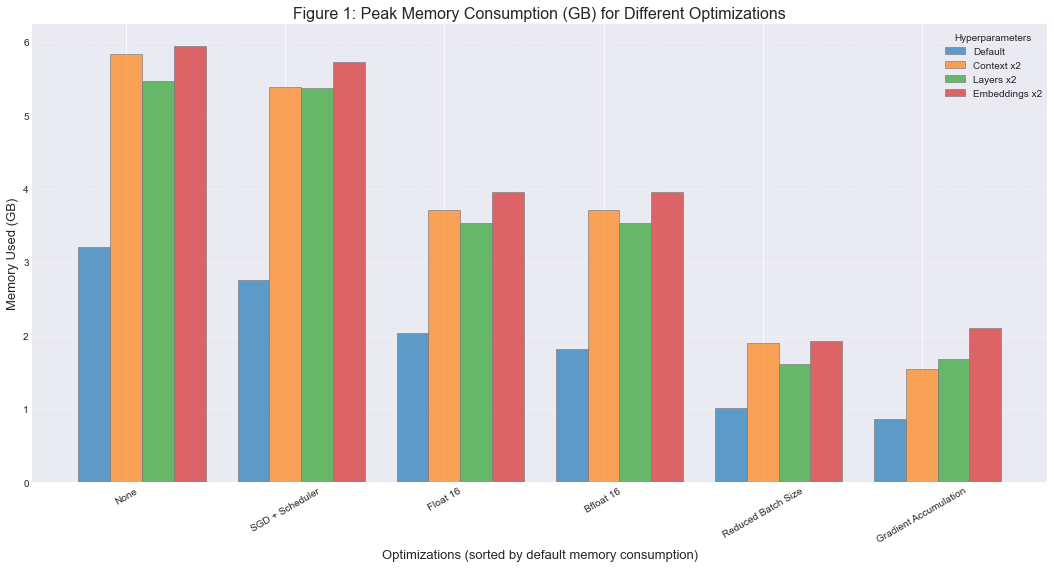

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Given order lists
hyperparameters_order = ["Default", "Context x2", "Layers x2", "Embeddings x2"]
optimizations_order = [
    "None",
    "SGD + Scheduler",
    "Float 16",
    "Bfloat 16",
    "Reduced Batch Size",
    "Gradient Accumulation",
]

# Using 'tab10' palette
colors = plt.cm.tab10.colors

# Setting the positions and width for the bars
bar_width = 0.2
r = np.arange(len(optimizations_order))  # the label locations

plt.figure(figsize=(15, 8))

# Creating bars with a touch of opacity (alpha)
for i, model_config in enumerate(hyperparameters_order):
    filtered_data = [
        entry for entry in results if entry["Model_config"] == model_config
    ]
    memory_used = [
        next(
            (
                entry["Memory Used (GB)"]
                for entry in filtered_data
                if entry["Optimization"] == opt
            ),
            0,
        )
        for opt in optimizations_order
    ]
    plt.bar(
        r + i * bar_width,
        memory_used,
        color=colors[i],
        width=bar_width,
        edgecolor="grey",
        alpha=0.69,
        label=model_config,
    )

# Aesthetics
plt.title(
    "Figure 1: Peak Memory Consumption (GB) for Different Optimizations", fontsize=16
)
plt.ylabel("Memory Used (GB)", fontsize=13)
plt.xlabel("Optimizations (sorted by default memory consumption)", fontsize=13)
plt.xticks(r + bar_width, optimizations_order, rotation=30, fontsize=10)
legend = plt.legend(
    title="Hyperparameters", bbox_to_anchor=(0.89, 1), loc="upper left", fontsize=10
)
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_edgecolor("black")
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.savefig("memory.png", dpi=300, bbox_inches="tight", pad_inches=0.5)

plt.show()

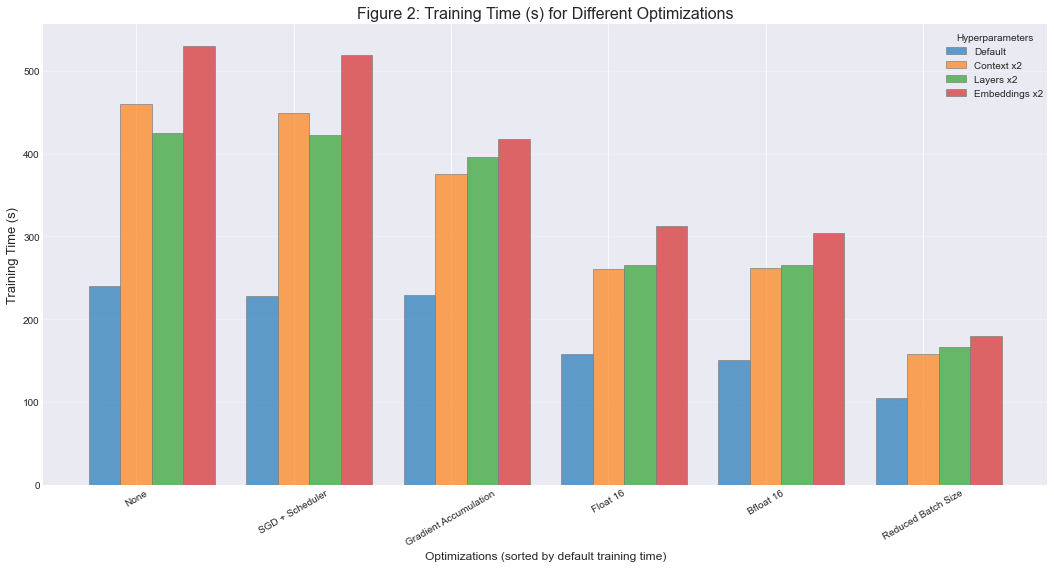

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Given order lists
hyperparameters_order = ["Default", "Context x2", "Layers x2", "Embeddings x2"]
optimizations_order = [
    "None",
    "SGD + Scheduler",
    "Gradient Accumulation",
    "Float 16",
    "Bfloat 16",
    "Reduced Batch Size",
]

# Using 'tab10' palette
colors = plt.cm.tab10.colors

# Setting the positions and width for the bars
bar_width = 0.2
r = np.arange(len(optimizations_order))  # the label locations

plt.figure(figsize=(15, 8))

# Creating bars with a touch of opacity (alpha)
for i, model_config in enumerate(hyperparameters_order):
    filtered_data = [
        entry for entry in results if entry["Model_config"] == model_config
    ]
    training_times = [
        next(
            (
                entry["Training Time (s)"]
                for entry in filtered_data
                if entry["Optimization"] == opt
            ),
            0,
        )
        for opt in optimizations_order
    ]
    plt.bar(
        r + i * bar_width,
        training_times,
        color=colors[i],
        width=bar_width,
        edgecolor="grey",
        alpha=0.69,
        label=model_config,
    )


# Aesthetics
plt.title("Figure 2: Training Time (s) for Different Optimizations", fontsize=16)
plt.ylabel("Training Time (s)", fontsize=13)
plt.xlabel(
    "Optimizations (sorted by default training time)",
    fontsize=12,
)
plt.xticks(r + bar_width, optimizations_order, rotation=30, fontsize=10)
legend = plt.legend(
    title="Hyperparameters", bbox_to_anchor=(0.89, 1), loc="upper left", fontsize=10
)
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_edgecolor("black")
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.savefig("training_time.png", dpi=300, bbox_inches="tight", pad_inches=0.5)

plt.show()

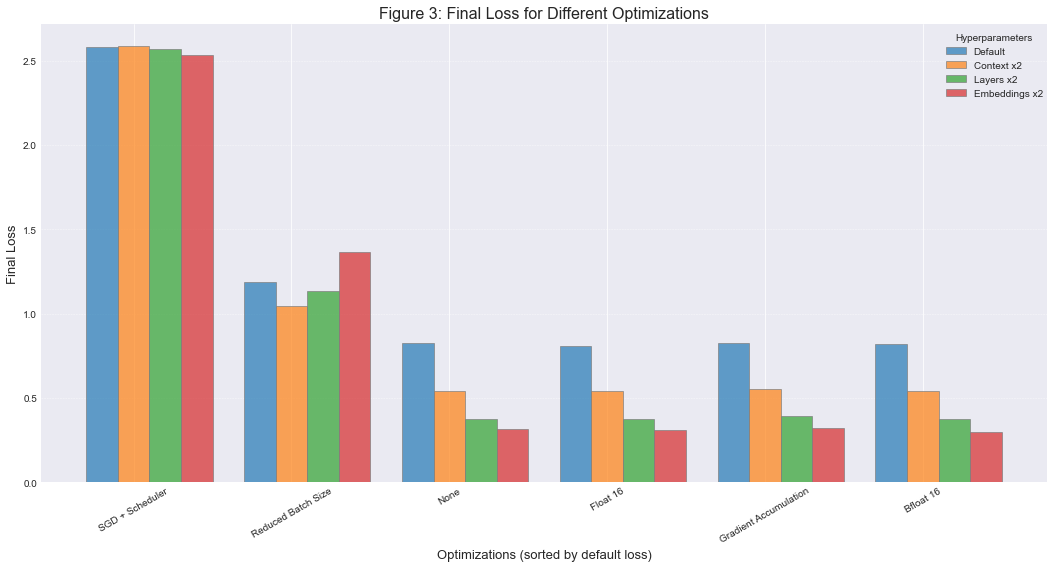

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Given order lists
hyperparameters_order = ["Default", "Context x2", "Layers x2", "Embeddings x2"]
optimizations_order = [
    "SGD + Scheduler",
    "Reduced Batch Size",
    "None",
    "Float 16",
    "Gradient Accumulation",
    "Bfloat 16",
]

# Using 'tab10' palette
colors = plt.cm.tab10.colors

# Setting the positions and width for the bars
bar_width = 0.2
r = np.arange(len(optimizations_order))  # the label locations

plt.figure(figsize=(15, 8))

# Creating bars with a touch of opacity (alpha)
for i, model_config in enumerate(hyperparameters_order):
    filtered_data = [
        entry for entry in results if entry["Model_config"] == model_config
    ]
    losses = [
        next(
            (
                entry["Final Loss"]
                for entry in filtered_data
                if entry["Optimization"] == opt
            ),
            0,
        )
        for opt in optimizations_order
    ]
    plt.bar(
        r + i * bar_width,
        losses,
        color=colors[i],
        width=bar_width,
        edgecolor="grey",
        alpha=0.69,
        label=model_config,
    )


# Aesthetics
plt.title("Figure 3: Final Loss for Different Optimizations", fontsize=16)
plt.ylabel("Final Loss", fontsize=13)
plt.xlabel("Optimizations (sorted by default loss)", fontsize=13)
plt.xticks(r + bar_width, optimizations_order, rotation=30, fontsize=10)
legend = plt.legend(
    title="Hyperparameters", bbox_to_anchor=(0.89, 1), loc="upper left", fontsize=10
)
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_edgecolor("black")
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()


plt.savefig("final_loss.png", dpi=300, bbox_inches="tight", pad_inches=0.5)

plt.show()

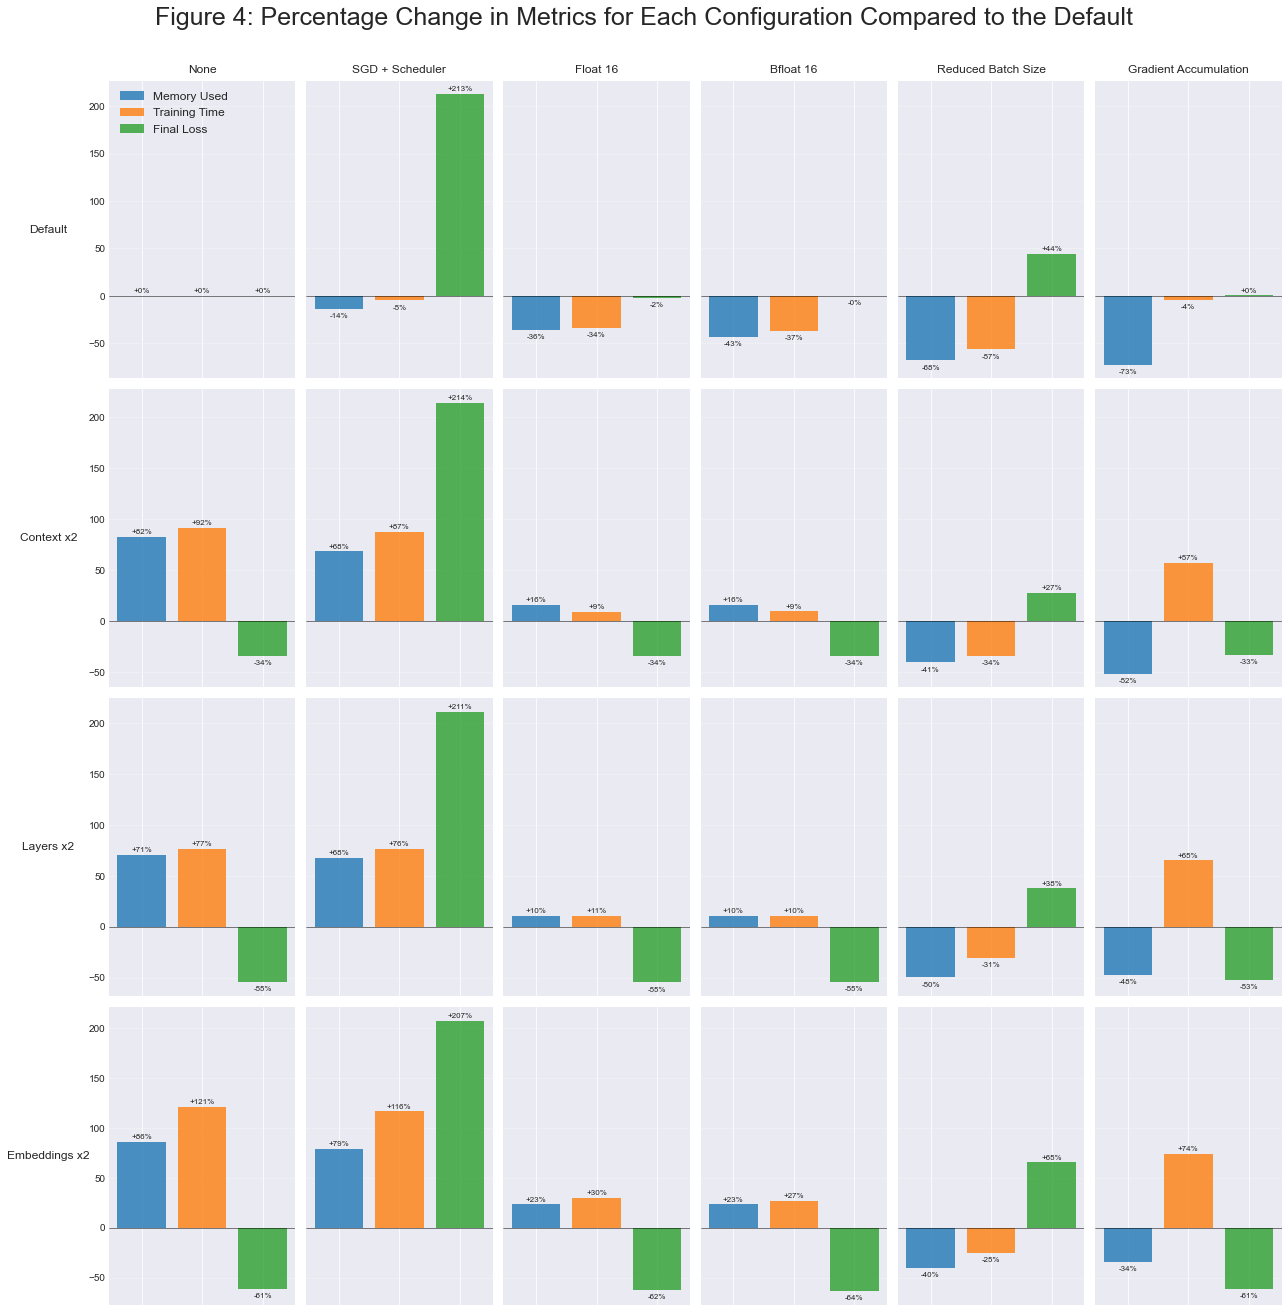

In [35]:
import matplotlib.pyplot as plt
import numpy as np


def percentage_change(new, old):
    return ((new - old) / old) * 100


# Given order lists
hyperparameters_order = ["Default", "Context x2", "Layers x2", "Embeddings x2"]
optimizations_order = [
    "None",
    "SGD + Scheduler",
    "Float 16",
    "Bfloat 16",
    "Reduced Batch Size",
    "Gradient Accumulation",
]

# Retrieve the 'baseline' values for (None, Default) pair
baseline = next(
    entry
    for entry in results
    if entry["Model_config"] == "Default" and entry["Optimization"] == "None"
)

# Create subplots
fig, axes = plt.subplots(
    len(hyperparameters_order),
    len(optimizations_order),
    figsize=(18, 18),
    sharex="col",
    sharey="row",
)

colors = plt.cm.tab10.colors[:3]
metrics = ["Memory Used", "Training Time", "Final Loss"]

# Main title
fig.suptitle(
    "Figure 4: Percentage Change in Metrics for Each Configuration Compared to the Default",
    fontsize=25,
    y=1.01,
)

# Iterate over model configurations and optimizations
for i, model_config in enumerate(hyperparameters_order):
    for j, optimization in enumerate(optimizations_order):
        ax = axes[i][j]

        # Calculate percentage changes for the current configuration
        data = next(
            entry
            for entry in results
            if entry["Model_config"] == model_config
            and entry["Optimization"] == optimization
        )
        memory_change = percentage_change(
            data["Memory Used (GB)"], baseline["Memory Used (GB)"]
        )
        time_change = percentage_change(
            data["Training Time (s)"], baseline["Training Time (s)"]
        )
        loss_change = percentage_change(data["Final Loss"], baseline["Final Loss"])

        bars = ax.bar(
            range(3), [memory_change, time_change, loss_change], color=colors, alpha=0.8
        )

        # Format ticks and add legend
        ax.tick_params(
            axis="x", which="both", bottom=False, top=False, labelbottom=False
        )
        ax.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
        ax.axhline(0, color="black", linewidth=0.5)  # Add a line at y=0 for clarity

        # Label the percentages on the y-axis
        for bar in bars:
            height = bar.get_height()
            y_offset = 2 if height >= 0 else -10
            ax.annotate(
                f"{height:+.0f}%",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, y_offset),
                textcoords="offset points",
                ha="center",
                va="bottom",
                fontsize=8,
            )

        # Titles for subplots
        if j == 0:
            ax.set_ylabel(
                f"{model_config}", fontsize=12, rotation=0, labelpad=40, va="center"
            )
        if i == 0:
            ax.set_title(
                f"{optimization}", fontsize=12, rotation=0, ha="center", va="bottom"
            )

        # Add a larger legend on the top-left subplot with more appropriate labels
        if i == 0 and j == 0:
            ax.legend(bars, metrics, loc="upper left", fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()
fig.savefig("output_filename.png", dpi=300, bbox_inches="tight", pad_inches=0.5)

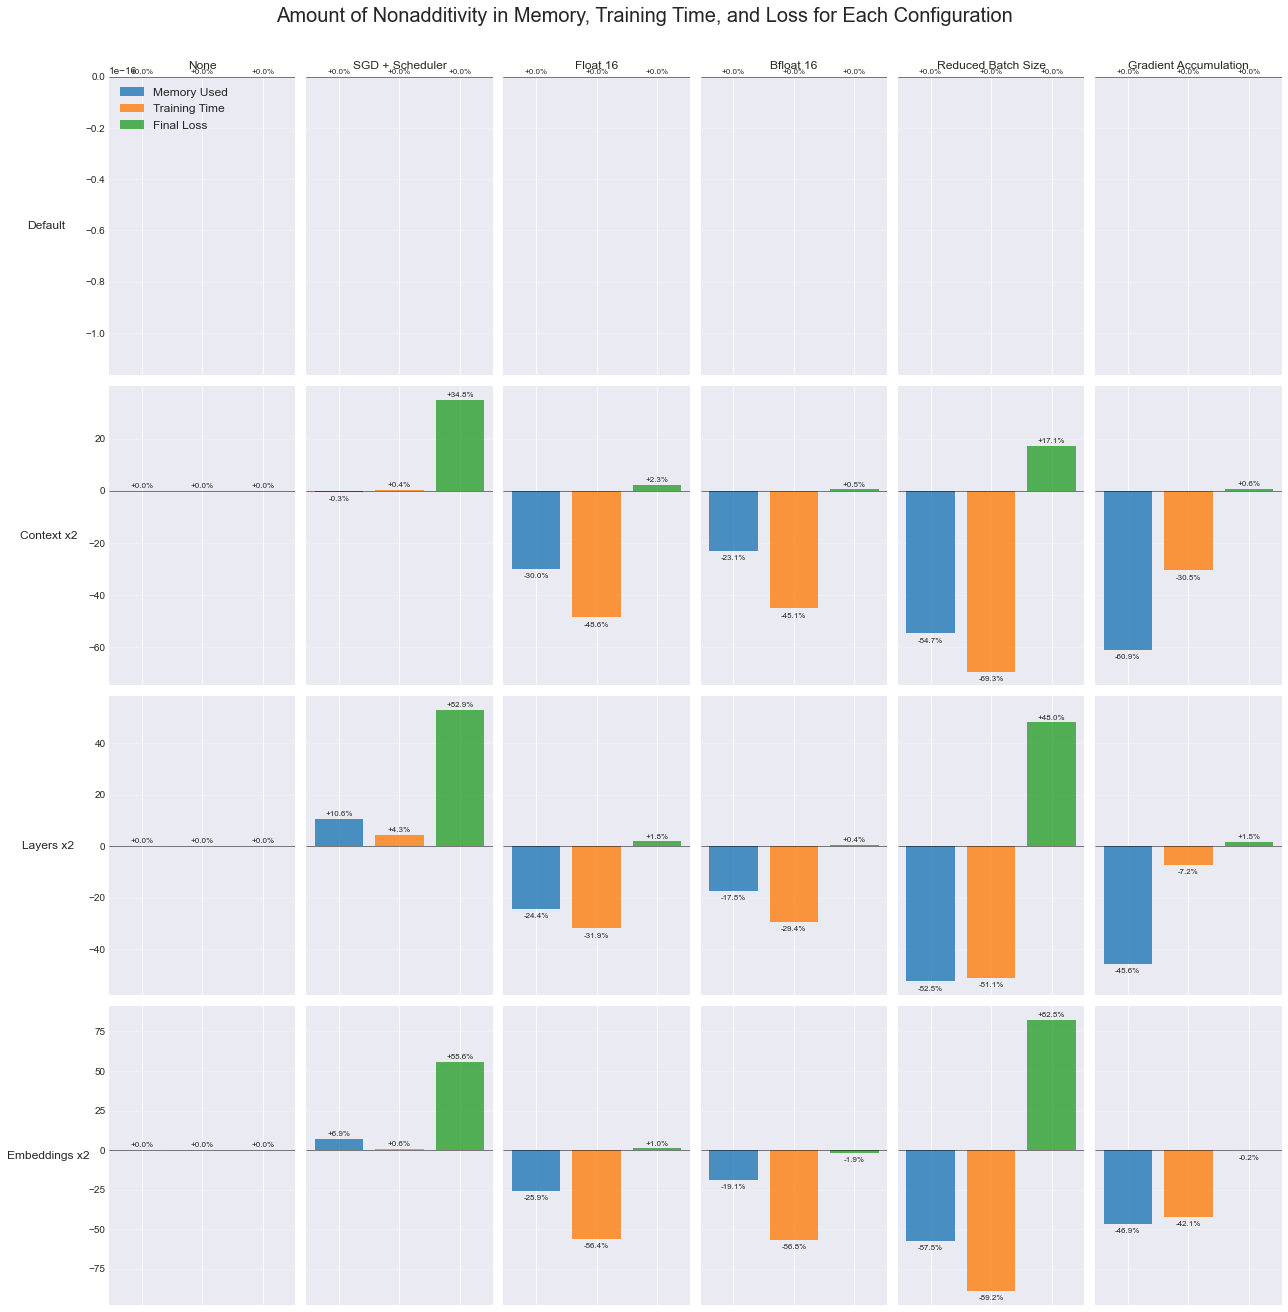

In [25]:
import matplotlib.pyplot as plt
import numpy as np


# Define the ordering explicitly
hyperparameters_order = ["Default", "Context x2", "Layers x2", "Embeddings x2"]
optimizations_order = [
    "None",
    "SGD + Scheduler",
    "Float 16",
    "Bfloat 16",
    "Reduced Batch Size",
    "Gradient Accumulation",
]
metrics = ["Memory Used", "Training Time", "Final Loss"]


# Function to calculate the expected additive percentage change for a pair of results
def compute_additive_effect(entry1, entry2, baseline, metric):
    percentage1 = percentage_change(entry1[metric], baseline[metric])
    percentage2 = percentage_change(entry2[metric], baseline[metric])
    return percentage1 + percentage2


# Create an empty array to store the differences for each metric
differences = np.zeros(
    (len(hyperparameters_order), len(optimizations_order), len(metrics))
)

# Iterate over model configurations and optimizations to compute differences
for i, model_config in enumerate(hyperparameters_order):
    for j, optimization in enumerate(optimizations_order):
        # Skip the default combinations
        if model_config == "Default" or optimization == "None":
            continue

        # Get the actual results for the current configuration
        data = next(
            entry
            for entry in results
            if entry["Model_config"] == model_config
            and entry["Optimization"] == optimization
        )

        # Get the results for the default configuration + hyperparameter Y (model_config)
        data_Y_default = next(
            entry
            for entry in results
            if entry["Model_config"] == model_config and entry["Optimization"] == "None"
        )

        # Get the results for the default configuration + optimization X
        data_default_X = next(
            entry
            for entry in results
            if entry["Model_config"] == "Default"
            and entry["Optimization"] == optimization
        )

        # Calculate the expected and actual percentage changes, then compute the difference
        for k, metric in enumerate(metrics):
            metric_key = {
                "Memory Used": "Memory Used (GB)",
                "Training Time": "Training Time (s)",
                "Final Loss": "Final Loss",
            }[metric]
            expected_change = compute_additive_effect(
                data_Y_default, data_default_X, baseline, metric_key
            )
            actual_change = percentage_change(data[metric_key], baseline[metric_key])
            differences[i, j, k] = actual_change - expected_change


# Create subplots
fig, axes = plt.subplots(
    len(hyperparameters_order),
    len(optimizations_order),
    figsize=(18, 18),
    sharex="col",
    sharey="row",
)

colors = plt.cm.tab10.colors[:3]

# Main title
fig.suptitle(
    "Amount of Nonadditivity in Memory, Training Time, and Loss for Each Configuration",
    fontsize=20,
    y=1.01,
)

# Iterate over model configurations and optimizations to plot differences
for i, model_config in enumerate(hyperparameters_order):
    for j, optimization in enumerate(optimizations_order):
        ax = axes[i][j]

        bars = ax.bar(range(3), differences[i, j], color=colors, alpha=0.8)

        # Format ticks and add legend
        ax.tick_params(
            axis="x", which="both", bottom=False, top=False, labelbottom=False
        )
        ax.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
        ax.axhline(0, color="black", linewidth=0.5)  # Add a line at y=0 for clarity

        # Label the percentages on the y-axis
        for k, bar in enumerate(bars):
            height = bar.get_height()
            y_offset = 2 if height >= 0 else -10
            ax.annotate(
                f"{height:+.1f}%",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, y_offset),
                textcoords="offset points",
                ha="center",
                va="bottom",
                fontsize=8,
            )

        # Titles for subplots
        if j == 0:
            ax.set_ylabel(
                f"{model_config}", fontsize=12, rotation=0, labelpad=40, va="center"
            )
        if i == 0:
            ax.set_title(
                f"{optimization}", fontsize=12, rotation=0, ha="center", va="bottom"
            )

        # Add a larger legend on the top-left subplot with more appropriate labels
        if i == 0 and j == 0:
            ax.legend(bars, metrics, loc="upper left", fontsize=12)

# Adjust layout
plt.tight_layout()
fig.savefig(
    "output_difference_filename.png", dpi=300, bbox_inches="tight", pad_inches=0.5
)
plt.show()